<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Model calibration and fit for sklearn regressions<span class="tocSkip"></span></h1>

This notebook illustrates how to calibrate and calculate fit for a variety of sklearn regression models:
* sklearn's linear_model family, with and without regularization
* Decision trees: DecisionTreeRegressor 
* Basic ensemble methods: Random Forest and Gradient Boosting

We make use of train-test splits (insample & out-of-sample), and where necessary also cross-validation for purposes of hyperparameter tuning. 

Explicit variable selection is covered in the notebook "sklearn Linear Model Variable Selection". Some models, such as regularized models (LASSO, Elastic Net) and tree-based models have "built-in" feature selection, and are covered in this notebook.

**All sklearn models follow a similar approach:**
1. Instantiate the model class (e.g. LinearRegression, LASSO, RandomForest, etc.) with relevant parameters (e.g. intercept, complexity / regularization penalty)
2. Fit model on the train dataset
3. Apply model on train and test dataset, and explore the model further using e.g. metrics (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) and/or plots such as those provided by the "model diagnostics" template

Some models benefit from hyperparameter tuning as part of Step 1, and we will cover Hyper-Parameter tuning for the model types that most benefit from it.

<h2>Table of Contents<span class="tocSkip"></span></h2>
<ul class="toc-item"><li><span><a href="#Import-key-libraries" data-toc-modified-id="Import-key-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import key libraries</a></span></li><li><span><a href="#Data-import-and-preparation" data-toc-modified-id="Data-import-and-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data import and preparation</a></span><ul class="toc-item"><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train-Test split</a></span><ul class="toc-item"><li><span><a href="#Random-train-test-split" data-toc-modified-id="Random-train-test-split-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Random train-test split</a></span></li><li><span><a href="#Stratified-train-test-split" data-toc-modified-id="Stratified-train-test-split-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Stratified train-test split</a></span></li><li><span><a href="#Random-sample-taken-based-on-a-subject-variable-(e.g.-Customer)" data-toc-modified-id="Random-sample-taken-based-on-a-subject-variable-(e.g.-Customer)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Random sample taken based on a subject variable (e.g. Customer)</a></span></li><li><span><a href="#Time/value-based-splitting" data-toc-modified-id="Time/value-based-splitting-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Time/value based splitting</a></span></li></ul></li><li><span><a href="#Data-transformations" data-toc-modified-id="Data-transformations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data transformations</a></span><ul class="toc-item"><li><span><a href="#Transform-the-train-dataset" data-toc-modified-id="Transform-the-train-dataset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Transform the train dataset</a></span></li><li><span><a href="#Transform-the-test-dataset" data-toc-modified-id="Transform-the-test-dataset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Transform the test dataset</a></span></li></ul></li></ul></li><li><span><a href="#Linear-model-calibration" data-toc-modified-id="Linear-model-calibration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear model calibration</a></span><ul class="toc-item"><li><span><a href="#Linear-regression-(OLS)-without-regularization" data-toc-modified-id="Linear-regression-(OLS)-without-regularization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear regression (OLS) without regularization</a></span></li><li><span><a href="#Generalized-Linear-Models" data-toc-modified-id="Generalized-Linear-Models-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generalized Linear Models</a></span><ul class="toc-item"><li><span><a href="#Gamma-regression" data-toc-modified-id="Gamma-regression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Gamma regression</a></span></li><li><span><a href="#Experimental-GLM-regression" data-toc-modified-id="Experimental-GLM-regression-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Experimental GLM regression</a></span></li></ul></li><li><span><a href="#Quantile-regression" data-toc-modified-id="Quantile-regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Quantile regression</a></span></li><li><span><a href="#LASSO-regression-with-hyperparameter-tuning-(for-penalty-parameter)" data-toc-modified-id="LASSO-regression-with-hyperparameter-tuning-(for-penalty-parameter)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LASSO regression with hyperparameter tuning (for penalty parameter)</a></span><ul class="toc-item"><li><span><a href="#Lasso-Cross-Validation-for-tuning-alpha-penalty-parameter" data-toc-modified-id="Lasso-Cross-Validation-for-tuning-alpha-penalty-parameter-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Lasso Cross-Validation for tuning alpha penalty parameter</a></span></li><li><span><a href="#Lasso-calibration-for-a-single-alpha-penalty-parameter" data-toc-modified-id="Lasso-calibration-for-a-single-alpha-penalty-parameter-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Lasso calibration for a single alpha penalty parameter</a></span></li><li><span><a href="#Lasso-calibration-for-multiple-alpha-penalty-parameters---TBD" data-toc-modified-id="Lasso-calibration-for-multiple-alpha-penalty-parameters---TBD-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Lasso calibration for multiple alpha penalty parameters - TBD</a></span></li></ul></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Elastic Net</a></span><ul class="toc-item"><li><span><a href="#Elastic-Net-hyperparameter-tuning-of-alpha-and-l1_ratio-parameters" data-toc-modified-id="Elastic-Net-hyperparameter-tuning-of-alpha-and-l1_ratio-parameters-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Elastic Net hyperparameter tuning of alpha and l1_ratio parameters</a></span></li><li><span><a href="#Elastic-Net-calibration-for-a-single-alpha-and-l1_ratio-penalty-parameter-pair" data-toc-modified-id="Elastic-Net-calibration-for-a-single-alpha-and-l1_ratio-penalty-parameter-pair-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Elastic Net calibration for a single alpha and l1_ratio penalty parameter pair</a></span></li></ul></li></ul></li><li><span><a href="#Tree-based-methods" data-toc-modified-id="Tree-based-methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tree-based methods</a></span><ul class="toc-item"><li><span><a href="#Binary-decision-tree-regressions" data-toc-modified-id="Binary-decision-tree-regressions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Binary decision tree regressions</a></span><ul class="toc-item"><li><span><a href="#Training-a-single-decision-tree" data-toc-modified-id="Training-a-single-decision-tree-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Training a single decision tree</a></span></li><li><span><a href="#Tuning-the-decision-tree-regression-using-Grid-Search" data-toc-modified-id="Tuning-the-decision-tree-regression-using-Grid-Search-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Tuning the decision tree regression using Grid Search</a></span></li></ul></li><li><span><a href="#Random-Forest-regression" data-toc-modified-id="Random-Forest-regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest regression</a></span><ul class="toc-item"><li><span><a href="#Tuning-the-random-forest-model-using-Grid-Search" data-toc-modified-id="Tuning-the-random-forest-model-using-Grid-Search-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Tuning the random forest model using Grid Search</a></span></li><li><span><a href="#Fit-a-single-random-forest-model" data-toc-modified-id="Fit-a-single-random-forest-model-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Fit a single random forest model</a></span></li><li><span><a href="#Examine-model-performance-across-trees-in-random-forest" data-toc-modified-id="Examine-model-performance-across-trees-in-random-forest-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Examine model performance across trees in random forest</a></span></li></ul></li><li><span><a href="#Gradient-Boosted-Tree-Regression" data-toc-modified-id="Gradient-Boosted-Tree-Regression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gradient Boosted Tree Regression</a></span><ul class="toc-item"><li><span><a href="#Tuning-the-gradient-boosted-tree-regression-using-Randomized-Search" data-toc-modified-id="Tuning-the-gradient-boosted-tree-regression-using-Randomized-Search-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Tuning the gradient boosted tree regression using Randomized Search</a></span></li><li><span><a href="#Fit-a-single-gradient-boosting-model" data-toc-modified-id="Fit-a-single-gradient-boosting-model-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Fit a single gradient boosting model</a></span></li></ul></li></ul></li></ul>

# Import key libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# Formatting of pandas dataframe
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
# Automatically update custom py scripts that are loaded in
%load_ext autoreload
%autoreload 2

# Load in OW color scheme and plot style
plt.style.use('../../utilities/resources/ow_style.mplstyle')

# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.insert(0, "../../utilities")
from resources.ow_colormap import ow_colormap
from regression import sklearn_regression_tools

# Data import and preparation

We will use a dataset for predicting car prices. 

In [3]:
# Read in the data using pandas, with low_memory=False in case the dataset is large
raw_dataset = pd.read_csv("sample_input/car_price_prediction.csv", low_memory=False)
raw_dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,"1,399.0000",LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4/5,Left wheel,Silver,12
1,44731507,16621,"1,018.0000",CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6,Tiptronic,4x4,4/5,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4/5,Right-hand drive,Black,2
3,45769185,3607,862.0000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4/5,Left wheel,White,0
4,45809263,11726,446.0000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4/5,Left wheel,Silver,4


**To keep this notebook focused on model calibration, we remove outliers where price is below 5000 and above 100000**

Refer to data exploration and model exploration templates for more in-depth analysis of the data itself 

In [4]:
dataset = raw_dataset[(raw_dataset['Price'] >= 5000) & (raw_dataset['Price'] <= 100000)].reset_index(drop=True).copy()

## Train-Test split

Regression models identify the relationship between a target variable (also known as dependent variable) and predictive (independent) variables found in the calibration data. 

To flexible and complex models may mis-interpret noise in the data as real signal, and thereby cause the model to overfit to the calibration data. Therefore, it is good practice to understand how the model performs on an 'unseen' portion of the dataset. This type of approach of splitting the data is often called 'train-test' split or in-sample vs. out-of-sample split. The idea is to use the train-sample to select variables and train your model, and review final candidate models on the test-sample to assess model performance. 

If you choose this approach, know that there are many ways to select how to split the data into train and test samples. It is important to keep in mind how the model will be used. 
* If the model is merely a descriptive model of the data you have gathered, then a random train-test split may be relevant
* If your model is used to predict new data, the relationship between the 'new data' and 'current data' should be similar to the relationship between 'test data' and 'train data', so that the model's performance on new data is proxied by the test data. For example:
    * If you are predicting the future of existing subjects (e.g. patients in a hospital), you will want the train-test split to be based on time
    * If you are predicting the outcome of new subjects, you will want the train-test split to be based on subject

**Note: Train-test splitting the data is not the only way to understand if a model is overfitted and its ability to generalize.** 
For example:
* Cross-validation can be a good alternative especially when data is too limited for a train-test split
* Some models have built-in capabilities (e.g. out-of-bag for random forests)

In [5]:
from sklearn.model_selection import train_test_split

y = dataset["Price"]
X = dataset[['Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume',
       'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors',
       'Wheel', 'Color', 'Airbags']]

**Below we show a few different ways to split this data**

### Random train-test split

75% train and 25% test dataset, random sampling across all data. The 'random_state' can be set to make it possible to recreate the sampling outcome.

**This is the train-test split we will use in this notebook**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

### Stratified train-test split

Stratified sampling helps ensure the sampling rate to be applied separately to each strata, to improve representativeness to the original (full) dataset.

**Here we stratify based by car Category**

In [7]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y, test_size=0.25, stratify=X['Category'], random_state=1000)

pd.DataFrame({"Train": X_train_stratified['Category'].value_counts(), "Test": X_test_stratified['Category'].value_counts()})

,Train,Test
Category,,
Sedan,4768,1590
Jeep,3070,1023
Hatchback,1603,534
Minivan,450,150
Coupe,322,108
Universal,256,85
Microbus,213,71
Goods wagon,145,48
Pickup,29,10


### Random sample taken based on a subject variable (e.g. Customer)

This approach ensures that every observation per subject (e.g. customer) will be in the same sample. Here we need to write our own implementation, for 'Model'. There are many ways to accomplish the sampling -- here we use the simplest: random sampling without replacement. 

In [8]:
subject_variable = "Model"
test_size = 0.25
seed = 1000

# This works when there are no missing values for the subject variable
unique_subjects = X[subject_variable].unique()
N_subjects = len(unique_subjects)
np.random.seed(seed)
train_subject_idx = np.where(np.random.uniform(size = N_subjects) > test_size, 1, 0)
train_subject = unique_subjects[train_subject_idx == 1]

train_idx = X[subject_variable].isin(train_subject)
X_train_subject, y_train_subject = X[train_idx], y[train_idx]
X_test_subject, y_test_subject = X[~train_idx], y[~train_idx]

### Time/value based splitting

The train-test split can be done based on the value of a variable. Most frequently this is done using time, using e.g. using the most recent time-period for test sample for a model to be used to forecast into the future. 

In [9]:
subject_variable = "Prod. year"
threshold = 2010

train_idx = X[subject_variable] <= threshold
X_train_time, y_train_time = X[train_idx], y[train_idx]
X_test_time, y_test_time = X[~train_idx], y[~train_idx]

## Data transformations

Many data transformations can be applied to the dataset before performing the train / test split. However, some transformations are data dependent and have parameters that need to be calibrated (e.g. winsorization, median-imputation, standardization) on the train dataset, to make sure the test dataset remains representative of the data that the model will eventually be used on. 

Here, we will apply the data transformations to the train and then to the test dataset, and for transformations requiring calibration, we will calibrate on train and apply to the test dataset.

To keep this notebook limited to model calibration and fit, we will apply some data transformations upfront, skipping the data exploration steps (separate templates exist for data diagnostics).

Lastly, be careful with how you handle missing values. Many models cannot calibrate on missing data, so either impute the missing values (in some cases, you may want to impute the missing value and then create an indicator for whether the value was originally missing) or remove those rows using dropna. If you drop missing values, make sure your X and y datasets are still aligned. 

### Transform the train dataset

We perform the following transformations:
* Bucket categorical variables to fewer buckets
* Create 0-1 indicator variables based on values or intervals of variables
* Impute missings of certain numerical variables to their median (requires calibration on train dataset)
* Perform a functional transformation (log) on certain numerical variables
* Convert categorical variables to 0-1 indicator variables. Keeping all indicators -- some models must have 1 indicator removed to avoid multicollinearity
* Some categorical variables have too many unique values (high cardinality) to be converted to separate 0-1 variables. If categories cannot be grouped up to form a less diverse categorical variable, and the variable is very important, we can consider encoding it by mapping its values to numeric values, based on the target variable in the train data (e.g. average or median target value). This needs to be done carefully (refer to the Data Transformation template for more information)
* Standardize continuous variables to a min of 0 and max of 1. The min and max used are calibrated on train dataset

In [10]:
# Transform certain columns
X_train['Category_clean'] = np.where(X_train['Category'].isin(['Sedan', 'Jeep', "Hatchback"]), X_train['Category'], "Other")
X_train['Recent'] = np.where(X_train['Prod. year'] > 2012, 1, 0)
X_train['IsLeather'] = np.where(X_train['Leather interior'] == "Yes", 1, 0)
X_train['Automatic'] = np.where(X_train['Gear box type'] == 'Automatic', 1, 0)
X_train['FuelType_clean'] = np.where(X_train['Fuel type'].isin(['Petrol', 'Diesel', "Hybrid"]), X_train['Fuel type'], "Other")
X_train['Cylinders_clean'] = np.where(X_train['Cylinders']<=4, "4 or less", np.where(X_train['Cylinders'] <= 6, "5 or 6", "7 or more"))
X_train['ColorType'] = np.where(X_train['Color'].isin(["Black", "White", "Silver", "Grey", "Blue", "Red"]), "Standard", "Unusual")
X_train['Manufacturer_clean'] = np.where(X_train['Manufacturer'].isin(['HYUNDAI', "TOYOTA", "MERCEDES-BENZ", "FORD", "CHEVROLET", 'BMW', "LEXUS", "HONDA", "NISSAN", "VOLKSWAGEN"]), 
                                                       X_train['Manufacturer'], "Other")

# Encode the 'Model' categorical variable. As long as there are at least 10 records, encode to the median target variable. If not in list, encode to median of entire dataset
model_values = X_train['Model'].value_counts()
model_values = model_values[model_values >= 10].index.tolist()
model_encoding = dict(pd.DataFrame({"Target": y_train, "Var": X_train["Model"]}).groupby("Var").median().filter(items=model_values, axis=0).reset_index().itertuples(index=False, name=None))
model_median_others = y_train[X_train['Model'].isin(model_values)].median()
X_train['Model_encoded'] = X_train['Model'].map(model_encoding).fillna(model_median_others)

# Median imputations requiring parameters
median_Levy = X_train['Levy'].median()
median_Mileage = X_train['Mileage'].median()

X_train['log_Levy'] = np.log10(X_train['Levy'].fillna(median_Levy))  # Impute and log-transform
X_train['log_Mileage'] = np.log10(1+X_train['Mileage'].fillna(median_Mileage)) # Impute and log-transform

# Retain only relevant vaiables
x_candidates = ['Category_clean', 'Recent', 'IsLeather', "Automatic", 
                "FuelType_clean", "Cylinders_clean", "Manufacturer_clean", "Model_encoded",
                "ColorType", "log_Levy", "log_Mileage"]
X_train_slim = X_train[x_candidates].copy()

# Some models should have numerical variables that are standardized. Here we standardize using MinMaxScaler (since we already have several 0-1 variables)
# We chose to create separate scalers for each of the two numeric variables that are not already 0-1. It is possible to create a scaler that covers multiple variables as once
from sklearn.preprocessing import MinMaxScaler
scaler_log_Levy = MinMaxScaler().fit(X_train_slim[['log_Levy']])
scaler_log_Mileage = MinMaxScaler().fit(X_train_slim[['log_Mileage']])
scaled_Model_encoded = MinMaxScaler().fit(X_train_slim[['Model_encoded']])

X_train_slim['log_Levy_standardized'] = scaler_log_Levy.transform(X_train_slim[['log_Levy']])
X_train_slim['log_Mileage_standardized'] = scaler_log_Mileage.transform(X_train_slim[['log_Mileage']])
X_train_slim['Model_encoded_standardized'] = scaled_Model_encoded.transform(X_train_slim[['Model_encoded']])

# Convert categorical variables to 0-1 indicator variables
categorical_variables = ['Category_clean', "FuelType_clean", "Cylinders_clean", "ColorType", "Manufacturer_clean"]
X_train_num = pd.get_dummies(X_train_slim, dummy_na=False, columns=categorical_variables, drop_first=False)

**Note: We manually imputed the Levy and Mileage variables above before log-transforming them.** But you can use sklearn's SimpleImputer to be calibrated on Train and then applied to both Train and Test samples. 

The syntax for SimpleImputer is here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html, and we make use of it in the data transformation template (download it through Gryphon)

In [11]:
# First few rows of the data
X_train_num.head()

,Recent,IsLeather,Automatic,Model_encoded,log_Levy,log_Mileage,log_Levy_standardized,log_Mileage_standardized,Model_encoded_standardized,Category_clean_Hatchback,...,Manufacturer_clean_CHEVROLET,Manufacturer_clean_FORD,Manufacturer_clean_HONDA,Manufacturer_clean_HYUNDAI,Manufacturer_clean_LEXUS,Manufacturer_clean_MERCEDES-BENZ,Manufacturer_clean_NISSAN,Manufacturer_clean_Other,Manufacturer_clean_TOYOTA,Manufacturer_clean_VOLKSWAGEN
2144,0,1,0,"16,935.0000",2.8915,3.0004,0.4472,0.3215,0.1832,False,...,False,False,False,False,False,False,False,True,False,False
12142,0,0,1,"14,740.0000",2.8915,5.2041,0.4472,0.5577,0.1465,False,...,False,False,False,False,False,False,False,False,True,False
4610,1,1,1,"13,634.0000",2.8837,5.8284,0.4435,0.6246,0.1279,False,...,False,False,False,True,False,False,False,False,False,False
1713,0,0,0,"11,525.5000",2.8915,5.2504,0.4472,0.5626,0.0927,True,...,False,False,True,False,False,False,False,False,False,False
12039,0,1,1,"7,997.0000",2.7657,5.2058,0.3881,0.5578,0.0336,False,...,False,False,False,False,False,False,False,True,False,False


### Transform the test dataset

Here we need to apply the corresponding transformations on the test data. For transformations that required calibration on the train dataset, we re-use the calibrated values. 

**If we received a new dataset on which to predict, we would apply these transformations**

In [12]:
# Transform certain columns
X_test['Category_clean'] = np.where(X_test['Category'].isin(['Sedan', 'Jeep', "Hatchback"]), X_test['Category'], "Other")
X_test['Recent'] = np.where(X_test['Prod. year'] > 2012, 1, 0)
X_test['IsLeather'] = np.where(X_test['Leather interior'] == "Yes", 1, 0)
X_test['Automatic'] = np.where(X_test['Gear box type'] == 'Automatic', 1, 0)
X_test['FuelType_clean'] = np.where(X_test['Fuel type'].isin(['Petrol', 'Diesel', "Hybrid"]), X_test['Fuel type'], "Other")
X_test['Cylinders_clean'] = np.where(X_test['Cylinders']<=4, "4 or less", np.where(X_test['Cylinders'] <= 6, "5 or 6", "7 or more"))
X_test['ColorType'] = np.where(X_test['Color'].isin(["Black", "White", "Silver", "Grey", "Blue", "Red"]), "Standard", "Unusual")
X_test['Manufacturer_clean'] = np.where(X_test['Manufacturer'].isin(['HYUNDAI', "TOYOTA", "MERCEDES-BENZ", "FORD", "CHEVROLET", 'BMW', "LEXUS", "HONDA", "NISSAN", "VOLKSWAGEN"]), 
                                                       X_test['Manufacturer'], "Other")

# Encode Car Model
X_test['Model_encoded'] = X_test['Model'].map(model_encoding).fillna(model_median_others)

# Median imputations -- reuse the medians calculated on train data
X_test['log_Levy'] = np.log10(X_test['Levy'].fillna(median_Levy))  # Impute and log-transform
X_test['log_Mileage'] = np.log10(1+X_test['Mileage'].fillna(median_Mileage)) # Impute and log-transform

# Retain only relevant vaiables
X_test_slim = X_test[x_candidates].copy()

# Re-use the scaling transformation that was calibrated on the train dataset
X_test_slim['log_Levy_standardized'] = scaler_log_Levy.transform(X_test_slim[['log_Levy']])
X_test_slim['log_Mileage_standardized'] = scaler_log_Mileage.transform(X_test_slim[['log_Mileage']])
X_test_slim['Model_encoded_standardized'] = scaled_Model_encoded.transform(X_test_slim[['Model_encoded']])

# Convert categorical variables to 0-1 indicator variables
categorical_variables = ['Category_clean', "FuelType_clean", "Cylinders_clean", "ColorType", "Manufacturer_clean"]
X_test_num = pd.get_dummies(X_test_slim, dummy_na=False, columns=categorical_variables, drop_first=False)

**When converting categorical variables to a set of indicator variables, it is possible that the test dataset doesn't have all the categories that are available in the train dataset**

This is certainly true if you later apply the model to predict a single data point, and often true when you have some infrequent categories (increasing the chances that all are found in the train data). 

So we may need to create additional indicator variables (all with 0 value) for the test dataset to mirror those in the train dataset. This is done, using 'reindex'. 

In [13]:
X_test_num = X_test_num.reindex(columns = X_test_num.columns, fill_value=0)

X_test_num.columns

Index(['Recent', 'IsLeather', 'Automatic', 'Model_encoded', 'log_Levy',
       'log_Mileage', 'log_Levy_standardized', 'log_Mileage_standardized',
       'Model_encoded_standardized', 'Category_clean_Hatchback',
       'Category_clean_Jeep', 'Category_clean_Other', 'Category_clean_Sedan',
       'FuelType_clean_Diesel', 'FuelType_clean_Hybrid',
       'FuelType_clean_Other', 'FuelType_clean_Petrol',
       'Cylinders_clean_4 or less', 'Cylinders_clean_5 or 6',
       'Cylinders_clean_7 or more', 'ColorType_Standard', 'ColorType_Unusual',
       'Manufacturer_clean_BMW', 'Manufacturer_clean_CHEVROLET',
       'Manufacturer_clean_FORD', 'Manufacturer_clean_HONDA',
       'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_LEXUS',
       'Manufacturer_clean_MERCEDES-BENZ', 'Manufacturer_clean_NISSAN',
       'Manufacturer_clean_Other', 'Manufacturer_clean_TOYOTA',
       'Manufacturer_clean_VOLKSWAGEN'],
      dtype='object')

# Linear model calibration

This covers calibration and model fit for popular linear models in sklearn, which are found here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Here we will showcase the following:
* LinearRegression (without regularization)
* Generalized Linear Model using the example with GammaRegression (without regularization) 
* Quantile regression for a more outlier robust model
* LASSO regression (with regularization, and with hyperparameter tuning)
* Elastic Net regression (with regularization, and with hyperparameter tuning)

A few tips:

When using regularized models, standardization of the data is recommended to avoid favoring certain variables over others due to their scale. In some cases selective standardization can be used to your favor (e.g. to force in specific variables) when using a regularized regression.

Some feature selection techniques rely on coefficient sizes, causing standardization to matter even for non-regularized regressions (see the sklearn Linear Model Variable Selection notebook). 

Non-regularized models require variables to not be fully multicollinear. 

In [14]:
from sklearn import linear_model, metrics

## Linear regression (OLS) without regularization

The main parameter you need to specify is whether to use an intercept or not. Intercept is almost always used, unless there is reason to believe that when X = 0 that you also have y = 0.

Syntax available here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

**Start by instantiating the model class**

In [17]:
ols_reg = linear_model.LinearRegression(fit_intercept=True)

**Calibrate the model by fitting on the train dataset for the selected set of variables**

In [18]:
x_variables = ['Recent', 'Automatic', 'log_Levy', 'log_Mileage', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               "Model_encoded"
               ]

In [19]:
ols_reg_fitted = ols_reg.fit(X_train_num[x_variables], y_train)

**Obtain information about the model, such as coefficients and basic metrics**

In [20]:
# Model coefficients

if ols_reg_fitted.fit_intercept:
    ols_coefs = pd.DataFrame({"Feature": list(ols_reg_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(ols_reg_fitted.coef_) + [ols_reg_fitted.intercept_]})
else:
    ols_coefs = pd.DataFrame({"Feature": ols_reg_fitted.feature_names_in_, "Coef": ols_reg_fitted.coef_})
ols_coefs

,Feature,Coef
0,Recent,"9,973.1915"
1,Automatic,"-4,072.9721"
2,log_Levy,"4,781.1503"
3,log_Mileage,-349.3028
4,Category_clean_Jeep,"5,256.3884"
5,Category_clean_Other,"3,030.3056"
6,Cylinders_clean_5 or 6,"2,190.0665"
7,Cylinders_clean_7 or more,"5,804.9210"
8,Manufacturer_clean_FORD,"-2,943.3507"
9,Manufacturer_clean_HYUNDAI,-334.5106


In [23]:
# Model in-sample prediction and metrics
ols_reg_train_pred = ols_reg_fitted.predict(X_train_num[x_variables])
ols_reg_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, ols_reg_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, ols_reg_train_pred), 
               metrics.mean_absolute_error(y_train, ols_reg_train_pred), 
               metrics.mean_squared_error(y_train, ols_reg_train_pred, squared=False)]
}
)

ols_reg_train_metrics

,Metric,Value
0,r2,0.4258
1,MAPE,0.4958
2,MAE,"7,728.9694"
3,RMSE,"11,291.0121"


**Generate out of sample fit, along with metrics**

In [24]:
# Model in-sample prediction and metrics
ols_reg_test_pred = ols_reg_fitted.predict(X_test_num[x_variables])
ols_reg_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, ols_reg_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, ols_reg_test_pred), 
               metrics.mean_absolute_error(y_test, ols_reg_test_pred), 
               metrics.mean_squared_error(y_test, ols_reg_test_pred, squared=False)]
}
)

ols_reg_test_metrics

,Metric,Value
0,r2,0.3869
1,MAPE,0.5064
2,MAE,"7,937.9530"
3,RMSE,"11,719.2742"


## Generalized Linear Models

Generalized Linear Models specify a functional link between Y and the linear combination of X, as well as an error distribution. A common link function is the 'log' function, such that log(Y) is predicted through a+bX. 

Read more about GLMs here: https://en.wikipedia.org/wiki/Generalized_linear_model

Here we will use sklearn's GammaRegression, which uses a log-link and a Gamma error distribution (errors expected to be larger for larger y-values). sklearn also provides the following methods:
* Poisson regression, usually when the y-variable represents a count (frequency)
* Tweedie regression, which can represent several types of GLM regression based on a parameter (see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html#sklearn.linear_model.TweedieRegressor)

We also have our own implementation of a few GLM regressions that also generate p-values. This code can be extended as needed.

### Gamma regression

We use: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.GammaRegressor.html#sklearn.linear_model.GammaRegressor
with no penalty parameter (alpha = 0) and with intercept (fit_intercept=True). 

If you want to use L1 regularization, the process for selecting an appropriate penalty parameter can be done via cross-validation and is covered in the section on LASSO.

**Instantiate and calibrate model**

In [27]:
gamma_reg = linear_model.GammaRegressor(fit_intercept=True, alpha=0, max_iter=1000)

x_variables = ['Recent', 'Automatic', 'log_Levy', 'log_Mileage', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               "Model_encoded"
               ]

gamma_reg_fitted = gamma_reg.fit(X_train_num[x_variables], y_train)

In [28]:
# Model coefficients

if gamma_reg_fitted.fit_intercept:
    gamma_coefs = pd.DataFrame({"Feature": list(gamma_reg_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(gamma_reg_fitted.coef_) + [gamma_reg_fitted.intercept_]})
else:
    gamma_coefs = pd.DataFrame({"Feature": gamma_reg_fitted.feature_names_in_, "Coef": gamma_reg_fitted.coef_})
gamma_coefs

,Feature,Coef
0,Recent,0.4631
1,Automatic,-0.1709
2,log_Levy,-0.1979
3,log_Mileage,-0.0145
4,Category_clean_Jeep,0.2227
5,Category_clean_Other,0.1475
6,Cylinders_clean_5 or 6,0.1603
7,Cylinders_clean_7 or more,0.3800
8,Manufacturer_clean_FORD,-0.1371
9,Manufacturer_clean_HYUNDAI,0.0120


**Metrics on training data**

In [29]:
# Model in-sample prediction and metrics
gamma_reg_train_pred = gamma_reg_fitted.predict(X_train_num[x_variables])
gamma_reg_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, gamma_reg_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, gamma_reg_train_pred), 
               metrics.mean_absolute_error(y_train, gamma_reg_train_pred), 
               metrics.mean_squared_error(y_train, gamma_reg_train_pred, squared=False)]
}
)

gamma_reg_train_metrics

,Metric,Value
0,r2,0.4238
1,MAPE,0.4718
2,MAE,"7,467.1234"
3,RMSE,"11,309.9778"


**Metrics on testing data**

In [30]:
# Model in-sample prediction and metrics
gamma_reg_test_pred = gamma_reg_fitted.predict(X_test_num[x_variables])
gamma_reg_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, gamma_reg_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, gamma_reg_test_pred), 
               metrics.mean_absolute_error(y_test, gamma_reg_test_pred), 
               metrics.mean_squared_error(y_test, gamma_reg_test_pred, squared=False)]
}
)

gamma_reg_test_metrics

,Metric,Value
0,r2,0.3633
1,MAPE,0.4845
2,MAE,"7,717.0853"
3,RMSE,"11,942.2410"


### Experimental GLM regression

In the glm_regression.py file, we have created functionality for calibrating generalized linear models (with p-values). These are estimated using Iteratively ReWeighted Least Squares method, e.g. see: https://towardsdatascience.com/iterated-reweighted-least-squares-and-glms-explained-9c0cc0063526

In [31]:
# Import the module
from regression import glm_regression

In [32]:
glm_summary, _, _ = glm_regression.fit_glm(
    used_data=pd.concat([X_train_num, y_train],axis=1), 
    y_var = "Price", 
    x_var = x_variables, 
    family = glm_regression.LogGaussian(), 
    weight = None, 
    tolerance = 0.001, 
    max_iter = 100,
    show_iter = False)

glm_summary

c:\repos\gryphonrepos\regressionmodeling\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Vars,coef,std-err,t-stat,p-val
0,Intercept,8.6565,0.1111,77.9431,0.0000
1,Recent,0.5285,0.0110,47.9085,0.0000
2,Automatic,-0.2508,0.0111,-22.4988,0.0000
3,log_Levy,0.2501,0.0375,6.6658,0.0000
4,log_Mileage,-0.0216,0.0054,-4.0165,0.0001
5,Category_clean_Jeep,0.2781,0.0124,22.4427,0.0000
6,Category_clean_Other,0.2228,0.0154,14.5089,0.0000
7,Cylinders_clean_5 or 6,0.0894,0.0143,6.2516,0.0000
8,Cylinders_clean_7 or more,0.1556,0.0194,8.0137,0.0000
9,Manufacturer_clean_FORD,-0.2095,0.0225,-9.3188,0.0000


**The coefficients above should be used to generate the prediction**

## Quantile regression

Quantile regression generates prediction for a quantile (e.g. median, 25th quantile, 75th quantile etc.) of the target variable. As you are likely well aware, the median is much less sensitive to outliers than the average. The other regressions covered here predict the Conditional Average (i.e. E[y|X]), whereas the median regressor would predict the Conditional Median.

As with the GammaRegressor, the QuantileRegressor also allows for an L1 penalty parameter. Here we will set the penalty to 0. For more information about calibrating the penalty, see the LASSO section.

Syntax information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html

**Instantiate and fit the model**

quantile = 0.5 yields the median prediction. 

sklearn's implementation of quantile regression can be slow for larger datasets. For larger datasets, it is recommended to use libraries other than sklearn (e.g. statsmodels quantReg). In our example, 5000 rows is nearly instant, but 10K rows takes forever.

In [36]:
import random

quantile_reg = linear_model.QuantileRegressor(fit_intercept=True, quantile=0.5, alpha=0, solver="highs")
N = 5000 # Number of rows

x_variables = ['Recent', 'Automatic', 'log_Levy', 'log_Mileage', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               "Model_encoded", 
              ]
sample_rows = random.sample(X_train_num.index.tolist(), N)
quantile_reg_fitted = quantile_reg.fit(X_train_num.loc[sample_rows,x_variables], y_train[sample_rows])

In [37]:
# Model coefficients

if quantile_reg_fitted.fit_intercept:
    quantile_coefs = pd.DataFrame({"Feature": list(quantile_reg_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(quantile_reg_fitted.coef_) + [quantile_reg_fitted.intercept_]})
else:
    quantile_coefs = pd.DataFrame({"Feature": quantile_reg_fitted.feature_names_in_, "Coef": quantile_reg_fitted.coef_})
quantile_coefs

,Feature,Coef
0,Recent,"5,938.7324"
1,Automatic,"-1,746.3798"
2,log_Levy,819.4269
3,log_Mileage,-21.5630
4,Category_clean_Jeep,"2,067.7760"
5,Category_clean_Other,914.9392
6,Cylinders_clean_5 or 6,521.6266
7,Cylinders_clean_7 or more,"3,307.9160"
8,Manufacturer_clean_FORD,"-1,608.6787"
9,Manufacturer_clean_HYUNDAI,"-1,513.7606"


**Metrics on training data**

Note that we are now comparing a quantile vs. the actual variable. For median, such a comparison is reasonable assuming errors are nearly symmetric, but it would not be reasonable to compare e.g. the 75th quantile.

In [38]:
# Model in-sample prediction and metrics
quantile_reg_train_pred = quantile_reg_fitted.predict(X_train_num[x_variables])
quantile_reg_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, quantile_reg_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, quantile_reg_train_pred), 
               metrics.mean_absolute_error(y_train, quantile_reg_train_pred), 
               metrics.mean_squared_error(y_train, quantile_reg_train_pred, squared=False)]
}
)

quantile_reg_train_metrics

,Metric,Value
0,r2,0.3850
1,MAPE,0.4312
2,MAE,"7,402.5794"
3,RMSE,"11,684.6258"


**Metrics on testing data**

In [39]:
# Model in-sample prediction and metrics
quantile_reg_test_pred = quantile_reg_fitted.predict(X_test_num[x_variables])
quantile_reg_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, quantile_reg_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, quantile_reg_test_pred), 
               metrics.mean_absolute_error(y_test, quantile_reg_test_pred), 
               metrics.mean_squared_error(y_test, quantile_reg_test_pred, squared=False)]
}
)

quantile_reg_test_metrics

,Metric,Value
0,r2,0.3337
1,MAPE,0.4478
2,MAE,"7,714.4745"
3,RMSE,"12,216.5764"


## LASSO regression with hyperparameter tuning (for penalty parameter)

LASSO regression is a linear regression with a penalty added to the usual Least Squares error term. This penalty is a L1 penalty, i.e. 'sum of absolute value of the coefficients'.

L2 penalty is the 'sum of squared coefficients', and would result in a so-called Ridge Regression (not covered here since approach is very similar to L1 penalty. The key difference is that all variables are kept in a Ridge Regression, while some variables start getting 0 coefficient in a LASSO).

L1 and L2 penalties includes both of the above, and would result in an Elastic Net regression, which is covered in the next section.

**We will first do hyperparameter tuning to find suitable values of the penalty parameter 'alpha'.** This is done by using cross-validation on the train dataset, comparing the outcomes of multiple choices of 'alpha.
* We use LassoCV for that cross-validation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
* Once the alpha parameter has been selected, we use the regular Lasso method: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

**We also use the standardized data here, since penalties are based on coefficient size**

We can also consider more models, as the introduction of penalty makes the model more robust against correlations between x-variables, and it also helps filter out less relevant variables automatically.

### Lasso Cross-Validation for tuning alpha penalty parameter

In [42]:
# Let LassoCV consider 100 different alpha values (you can also specify manual list of alpha values to consider if the ones selected automatically are poor)
Lasso_CV_model = linear_model.LassoCV(eps=0.0001, n_alphas=100, alphas=None, 
                                              fit_intercept=True, 
                                              cv=5, verbose=0, random_state=1000)

x_variables = ['Recent', 'Automatic', 'log_Levy_standardized', 'log_Mileage_standardized', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'ColorType_Standard', 'ColorType_Unusual',
               'FuelType_clean_Hybrid', 'FuelType_clean_Other',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 
               'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               "Model_encoded_standardized"
               ]

Lasso_CV_outcomes = Lasso_CV_model.fit(X_train_num[x_variables], y_train)

**We can now plot the RMSE vs. the alpha values**

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Alpha,"2,781.7726","2,534.6476","2,309.4765","2,104.3090","1,917.3680","1,747.0343","1,591.8326","1,450.4185","1,321.5674","1,204.1630",...,0.6426,0.5855,0.5335,0.4861,0.4429,0.4036,0.3677,0.3351,0.3053,0.2782
Mean RMSE,"14,885.4852","14,725.3896","14,575.6286","14,380.9144","14,152.0044","13,959.1123","13,796.9256","13,660.8165","13,546.7810","13,451.3757",...,"11,209.1556","11,209.1570","11,209.1584","11,209.1597","11,209.1611","11,209.1624","11,209.1636","11,209.1648","11,209.1659","11,209.1670"


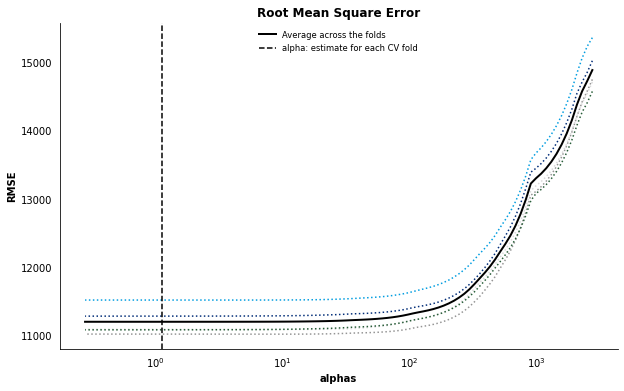

In [43]:
ax, table = sklearn_regression_tools.plot_LassoCV_path(Lasso_CV_outcomes);
table.T

Note: Alternative methods to LassoCV are covered here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html and using the more general GridSearchCV approach: https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html

**We can then select one or multiple alpha values to calibrate the LASSO model**

Lasso_CV also selects the best alpha value based on cross-validation. Though it is often advisable to review similarly performing models that may be more intuitive without sacrificing model fit.

In [44]:
# Best alpha value selected by cross-validation
Lasso_CV_outcomes.alpha_

1.1230064068778767

### Lasso calibration for a single alpha penalty parameter

Here we selected an alpha parameter of 100, which has similar fit as the best alpha value 

In [47]:
Lasso_model = linear_model.Lasso(alpha=100, fit_intercept=True)
Lasso_model_fitted = Lasso_model.fit(X_train_num[x_variables], y_train)

In [48]:
# Model coefficients
if Lasso_model_fitted.fit_intercept:
    model_coefs = pd.DataFrame({"Feature": list(Lasso_model_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(Lasso_model_fitted.coef_) + [Lasso_model_fitted.intercept_]})
else:
    model_coefs = pd.DataFrame({"Feature": Lasso_model_fitted.feature_names_in_, "Coef": Lasso_model_fitted.coef_})
model_coefs

,Feature,Coef
0,Recent,"9,461.9093"
1,Automatic,"-2,938.5784"
2,log_Levy_standardized,0.0000
3,log_Mileage_standardized,-0.0000
4,Category_clean_Jeep,"5,128.7415"
5,Category_clean_Other,"2,119.8709"
6,Cylinders_clean_5 or 6,"2,026.5154"
7,Cylinders_clean_7 or more,"5,232.2106"
8,ColorType_Standard,105.7244
9,ColorType_Unusual,-0.0000


**Generate metrics on train and test data** 

In [49]:
# Model in-sample prediction and metrics
lasso_reg_train_pred = Lasso_model_fitted.predict(X_train_num[x_variables])
lasso_reg_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, lasso_reg_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, lasso_reg_train_pred), 
               metrics.mean_absolute_error(y_train, lasso_reg_train_pred), 
               metrics.mean_squared_error(y_train, lasso_reg_train_pred, squared=False)]
}
)

lasso_reg_train_metrics

,Metric,Value
0,r2,0.4246
1,MAPE,0.4785
2,MAE,"7,594.5793"
3,RMSE,"11,302.9403"


In [50]:
# Model test prediction and metrics
lasso_reg_test_pred = Lasso_model_fitted.predict(X_test_num[x_variables])
lasso_reg_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, lasso_reg_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, lasso_reg_test_pred), 
               metrics.mean_absolute_error(y_test, lasso_reg_test_pred), 
               metrics.mean_squared_error(y_test, lasso_reg_test_pred, squared=False)]
}
)

lasso_reg_test_metrics

,Metric,Value
0,r2,0.3884
1,MAPE,0.4894
2,MAE,"7,780.7164"
3,RMSE,"11,704.6810"


### Lasso calibration for multiple alpha penalty parameters - TBD

This is often done to check which variables are selected in the LASSO model, as a higher penalty results in fewer variables selected.

This section will come later. For time being, see the use of LASSO for variable selection in the "sklearn regression variable selection notebook"

## Elastic Net

Elastic net uses both L1 and L2 penalties, resulting in two penalty parameters. Some algorithms define the L1 and L2 penalties as two separate parameters, whereas sklearn uses 'alpha' and 'l1_ratio' (between 0 an 1) in the following manner:
* L1 penalty = alpha * l1_ratio
* L2 penalty = 0.5 * alpha * (1 - l1_ratio)

To select alpha and l1_ratio using cross-validation, we consider a 2D grid of alpha and l1_ratio combinations. 

Since these penalties are based on the size of the coefficients, it is recommended to use standardized data. 

### Elastic Net hyperparameter tuning of alpha and l1_ratio parameters

Read more about the syntax here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html

We have to set the potential l1_ratio values manually. There is a choice whether to set alphas automatically (by specifying n_alphas) or setting them manually:
* If alphas are set automatically, the set of alpha values will vary for each l1_ratio, but the L1 penalty will remain the same set
* If alphas are set manually, the same set of alpha valus will be used for each l1_ratio

We need to take this into account when plotting the model error in the grid vs. penalty values. For simplicity, we set the alphas manually in this example

In [54]:
# Let ElasticNetCV consider 100 different alpha values (you can also specify manual list of alpha values to consider if the ones selected automatically are poor) and a set of l1_ratio values
ENet_CV_model = linear_model.ElasticNetCV(eps=0.0001, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
                                          n_alphas=None, alphas=[0.01, 0.1, 1, 10, 100, 1000, 10000], 
                                          fit_intercept=True, 
                                          cv=5, verbose=0, random_state=1000, max_iter=10000)

x_variables = ['Recent', 'Automatic', 'log_Levy_standardized', 'log_Mileage_standardized', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'ColorType_Standard', 'ColorType_Unusual',
               'FuelType_clean_Hybrid', 'FuelType_clean_Other',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 
               'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               "Model_encoded_standardized"
               ]

ENet_CV_outcomes = ENet_CV_model.fit(X_train_num[x_variables], y_train)

**We can now plot the RMSE vs. the grid of alpha and l1_ratio values**

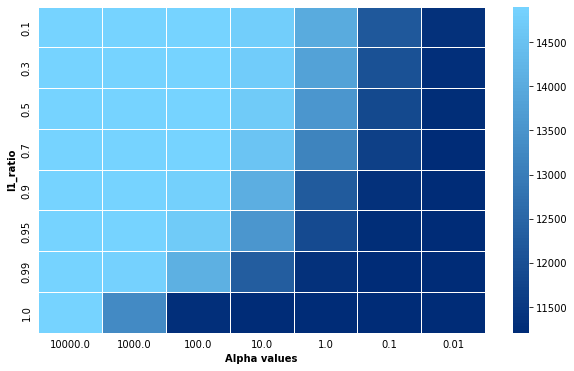

In [55]:
ax, table = sklearn_regression_tools.plot_ElasticNetCV_path(ENet_CV_outcomes, cmap = ow_colormap('blues'));

In [56]:
# Column header = alpha, row name = l1_ratio 
table

,"10,000.0000","1,000.0000",100.0000,10.0000,1.0000,0.1000,0.0100
0.1000,"14,900.7299","14,899.6272","14,888.4589","14,780.8637","13,997.2282","12,203.8567","11,335.1958"
0.3000,"14,900.7891","14,899.5012","14,885.1681","14,748.4134","13,822.6228","12,051.5903","11,299.5025"
0.5000,"14,900.7891","14,899.2397","14,879.2620","14,691.6718","13,563.2764","11,873.3682","11,264.7967"
0.7000,"14,900.7891","14,898.5749","14,865.5696","14,567.0220","13,135.6130","11,653.3884","11,233.7742"
0.9000,"14,900.7891","14,895.0654","14,798.9185","14,069.7300","12,274.1896","11,353.0776","11,212.3513"
0.9500,"14,900.7891","14,889.7913","14,704.2632","13,571.0424","11,874.8567","11,264.8636","11,209.8571"
0.9900,"14,900.7891","14,848.7063","14,119.1521","12,289.0903","11,354.0313","11,212.3737","11,209.1446"
1.0000,"14,900.7891","13,305.2929","11,318.2947","11,210.9782","11,209.1504","11,209.1748","11,209.1793"


**We can get the alpha and l1_ratio corresponding to the best fit**

In [57]:
# Best alpha and l1_ratio values selected by cross-validation
ENet_CV_outcomes.alpha_, ENet_CV_outcomes.l1_ratio_

(0.01, 0.99)

**However, the best fit may not be what you want, as there may be many similarly fitting models that are more intuitive** Next section shows how you can explore alpha and l1_ratio penalty pairs further.

### Elastic Net calibration for a single alpha and l1_ratio penalty parameter pair

Here we select an alpha and l1_ratio that are reasonable

In [58]:
ENet_model = linear_model.ElasticNet(alpha=0.1, l1_ratio=0.99, fit_intercept=True)
ENet_model_fitted = ENet_model.fit(X_train_num[x_variables], y_train)

In [59]:
# Model coefficients
if ENet_model_fitted.fit_intercept:
    model_coefs = pd.DataFrame({"Feature": list(ENet_model_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(ENet_model_fitted.coef_) + [ENet_model_fitted.intercept_]})
else:
    model_coefs = pd.DataFrame({"Feature": ENet_model_fitted.feature_names_in_, "Coef": ENet_model_fitted.coef_})
model_coefs

,Feature,Coef
0,Recent,"10,084.0546"
1,Automatic,"-3,830.6305"
2,log_Levy_standardized,"7,515.2560"
3,log_Mileage_standardized,"-2,051.0581"
4,Category_clean_Jeep,"5,408.9435"
5,Category_clean_Other,"2,911.3278"
6,Cylinders_clean_5 or 6,"2,367.5797"
7,Cylinders_clean_7 or more,"6,255.1043"
8,ColorType_Standard,625.4537
9,ColorType_Unusual,-427.3046


**Generate metrics on train and test data** 

In [60]:
# Model in-sample prediction and metrics
ENet_reg_train_pred = ENet_model_fitted.predict(X_train_num[x_variables])
ENet_reg_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, ENet_reg_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, ENet_reg_train_pred), 
               metrics.mean_absolute_error(y_train, ENet_reg_train_pred), 
               metrics.mean_squared_error(y_train, ENet_reg_train_pred, squared=False)]
}
)

ENet_reg_train_metrics

,Metric,Value
0,r2,0.4354
1,MAPE,0.4844
2,MAE,"7,604.0134"
3,RMSE,"11,195.5995"


In [61]:
# Model test prediction and metrics
ENet_reg_test_pred = ENet_model_fitted.predict(X_test_num[x_variables])
ENet_reg_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, ENet_reg_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, ENet_reg_test_pred), 
               metrics.mean_absolute_error(y_test, ENet_reg_test_pred), 
               metrics.mean_squared_error(y_test, ENet_reg_test_pred, squared=False)]
}
)

ENet_reg_test_metrics

,Metric,Value
0,r2,0.4028
1,MAPE,0.4910
2,MAE,"7,752.5219"
3,RMSE,"11,566.1789"


# Tree-based methods

Tree-based models do not assume a linear relationship between target variable and independent variables. Instead, it defines breakpoints in the data based on the x-variable value. 

The simplest method is the Binary Decision Tree, where at each internal node, the data is split into two based on the value of the x-variable at the node -- that split point is determined based on a measure of the difference of the target variable value in the corresponding two subsets of data. 

Splits in the tree-based method is determined in a greedy manner, leading to Decision Trees to quickly start overfitting. To overcome this, a number of techniques are available:
* Limiting the complexity of the tree; either upfront, by setting maximum limits on the depth of the tree, minimum number of observations per node to consider a split; or after initial calibration by pruning the tree
* Regularization, by setting a penalty on the complexity of the tree, such that the model fit must improve more than said penalty
* Randomization, e.g. considering a subset of variables for splitting at each node (rather than all variables) or using a subset of data to determine a split
* Ensembling / combining a large number of trees (such as random forest and gradient boosted trees)

**This section will cover Binary Decision Trees, Random Forest, and Gradient Boosting methods from sklearn**

**Note: sklearn's implementation of these do not handle categorical variables** 
Ordinal variables can be coded to a numerical variable, e.g. Low -> 1, Medium -> 2, High -> 3. If you have many categorical variables, consider e.g.:
- Continue to use Random Forest and Gradient Boosting with One-Hot encoding. The number of trees should mitigate the limitation of not being able to use categorical variables as splits directly.
- Using a different ensemble model from sklearn, e.g. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html
- Using an alternative ensembling library: xgboost, lightgbm or catboost
- Use rpart in R (instead of Python) for basic decision trees
- Wait until support for categorical variables becomes available for decision trees, see: https://github.com/scikit-learn/scikit-learn/pull/12866


## Binary decision tree regressions

In the standard decision tree for regression, the prediction for each node is simply the average value of the target variable within that node. If other error metrics are used, the prediction may be different from the average.

Common reasons a decision is used include:
* Simple model without worrying about non-linearities
* Model easily explained to non-technical clients
* Offers insights on 'segments' within the data

There are certain things to watch out for however, e.g.:
* Model predictions will suddenly jump, as the number of different predictions is limited (based on cutoffs in x-variables)
* X-variables do not have monotone relationship vs. x-variables
* Very easy to overfit the model

Read more about the decision tree here (advantages and disadvantages): https://scikit-learn.org/stable/modules/tree.html 

### Training a single decision tree

We need to select the error metric, maximum tree depth, minimum number of observations in a node to be split, minimum samples or proportion in final leafs, maximum number of final leafs, minimum purity decrease to warrant a split, complexity parameter to prune the tree if it gets too large.

For details see the syntax: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.htm

**Start by instantiating the model class**

In [15]:
from sklearn import tree
decision_tree = tree.DecisionTreeRegressor(criterion='absolute_error',  
                                           max_depth=3, min_samples_split=50, min_samples_leaf=20, 
                                           min_impurity_decrease=0.1, ccp_alpha=0.001)

**Define variables and fit the model**

In [16]:
x_variables = ['Recent', 'Automatic', 'log_Levy', 'log_Mileage', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               "Model_encoded"]

decision_tree_fitted = decision_tree.fit(X_train_num[x_variables], y_train)

**Visualize the tree**

We use the basic plot_tree method. A more advanced tree can be obtained if you have 'graphviz' available, see e.g. https://mljar.com/blog/visualize-decision-tree/

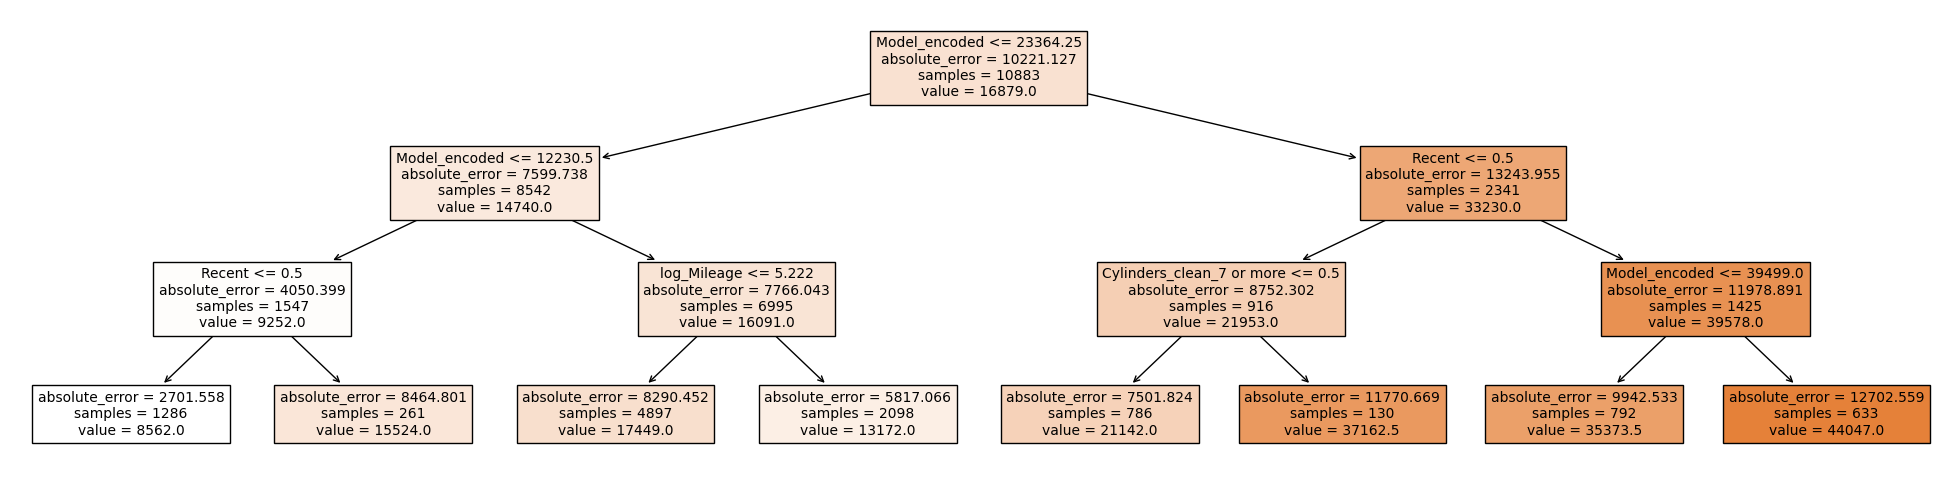

In [17]:
fig, ax = plt.subplots(figsize=(25,6))
tree.plot_tree(decision_tree_fitted, ax=ax, fontsize=10, feature_names=decision_tree_fitted.feature_names_in_, filled=True);

**Generate train and test predictions and metrics**

In [18]:
# Model in-sample prediction and metrics
decision_tree_train_pred = decision_tree_fitted.predict(X_train_num[x_variables])
decision_tree_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, decision_tree_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, decision_tree_train_pred), 
               metrics.mean_absolute_error(y_train, decision_tree_train_pred), 
               metrics.mean_squared_error(y_train, decision_tree_train_pred, squared=False)]
}
)

decision_tree_train_metrics

,Metric,Value
0,r2,0.3304
1,MAPE,0.4123
2,MAE,"7,518.8726"
3,RMSE,"12,192.5802"


In [19]:
# Model out-of-sample prediction and metrics
decision_tree_test_pred = decision_tree_fitted.predict(X_test_num[x_variables])
decision_tree_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, decision_tree_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, decision_tree_test_pred), 
               metrics.mean_absolute_error(y_test, decision_tree_test_pred), 
               metrics.mean_squared_error(y_test, decision_tree_test_pred, squared=False)]
}
)

decision_tree_test_metrics

,Metric,Value
0,r2,0.2876
1,MAPE,0.4274
2,MAE,"7,750.4859"
3,RMSE,"12,632.3128"


### Adding the leaf assignment and comparing distributions of specific variables by leaf

In [31]:
# Get predictions into a new column of the dataset
dataset_for_plotting = X_train.copy()

dataset_for_plotting['prediction'] = decision_tree_fitted.predict(X_train_num[x_variables])

In [32]:
# Frequency
dataset_for_plotting['prediction'].value_counts()

prediction
17,449.0000    4897
13,172.0000    2098
8,562.0000     1286
35,373.5000     792
21,142.0000     786
44,047.0000     633
15,524.0000     261
37,162.5000     130
Name: count, dtype: int64

In [33]:
dataset_for_plotting.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Category_clean', 'Recent', 'IsLeather', 'Automatic',
       'FuelType_clean', 'Cylinders_clean', 'ColorType', 'Manufacturer_clean',
       'Model_encoded', 'log_Levy', 'log_Mileage', 'prediction'],
      dtype='object')

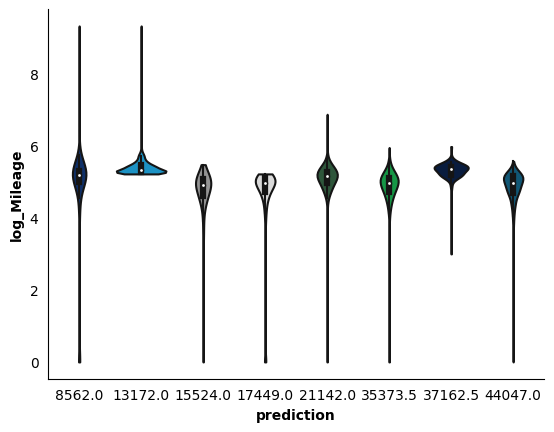

In [36]:
import seaborn as sns

x_variable = "log_Mileage"

g = sns.violinplot(x='prediction', y=x_variable, data=dataset_for_plotting, cut = 0)

### Tuning the decision tree regression using Grid Search

Grid Search offers a way to test all combinations of specific parameters and their possible values. Every set of parameters will be used to train a model, and the parameters of the best model are typically selected. To avoid overfitting, cross-validation is generally used, and models are compared using the cross-validation metrics. 

Syntax: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

If there are too many combinations of parameter values to test, consider:
* Randomized search: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html. See the Gradient Boosting model for an example. 
* Bayesian tuning. It is available in a different library https://scikit-optimize.github.io/stable/, and examples will be provided in a future notebook template.

**Note:** If you have a very large number of variables (especially variables are highly correlated), it is recommended that you also perform some feature selection, as there is high risk of overfitting in a decision tree. You can perform feature selection in many ways. A popular approach is to use some of the more complex methods such as random forest, gradient boosting, or ExtraTrees (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html) to find the most important variables.


**Setting the Grid-Search values for the parameters to be tuned**

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,4],
    "min_samples_split":[50,250],
    "min_samples_leaf": [20,100],
    "min_impurity_decrease": [0.1, 1],
    "ccp_alpha": [0, 0.01, 0.1]
}

# Fixed parameters can also be passed directly in the model instantiation
decision_tree_model = tree.DecisionTreeRegressor(criterion='absolute_error')

decision_tree_tuning = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring="neg_mean_absolute_error", cv=5, verbose=3)

In [74]:
decision_tree_tuning = decision_tree_tuning.fit(X_train_num[x_variables], y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=20, min_samples_split=50;, score=-7474.476 total time=   1.8s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=20, min_samples_split=50;, score=-7774.544 total time=   2.4s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=20, min_samples_split=50;, score=-7602.504 total time=   1.9s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=20, min_samples_split=50;, score=-7572.957 total time=   1.7s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=20, min_samples_split=50;, score=-7526.786 total time=   2.3s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=20, min_samples_split=250;, score=-7474.476 total time=   1.8s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.1, m

[CV 2/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.1, min_samples_leaf=100, min_samples_split=250;, score=-7424.390 total time=   1.9s
[CV 3/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.1, min_samples_leaf=100, min_samples_split=250;, score=-7385.859 total time=   2.0s
[CV 4/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.1, min_samples_leaf=100, min_samples_split=250;, score=-7318.185 total time=   2.0s
[CV 5/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.1, min_samples_leaf=100, min_samples_split=250;, score=-7249.851 total time=   2.6s
[CV 1/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=1, min_samples_leaf=20, min_samples_split=50;, score=-7263.707 total time=   2.0s
[CV 2/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=1, min_samples_leaf=20, min_samples_split=50;, score=-7384.057 total time=   1.8s
[CV 3/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=1, min_samples_leaf=20, min_samples_split=50;, score=-7366.768 to

[CV 3/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=1, min_samples_leaf=100, min_samples_split=50;, score=-7539.095 total time=   2.0s
[CV 4/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=1, min_samples_leaf=100, min_samples_split=50;, score=-7572.957 total time=   2.1s
[CV 5/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=1, min_samples_leaf=100, min_samples_split=50;, score=-7562.337 total time=   1.8s
[CV 1/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=1, min_samples_leaf=100, min_samples_split=250;, score=-7448.449 total time=   1.7s
[CV 2/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=1, min_samples_leaf=100, min_samples_split=250;, score=-7774.544 total time=   2.0s
[CV 3/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=1, min_samples_leaf=100, min_samples_split=250;, score=-7539.095 total time=   2.7s
[CV 4/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=1, min_samples_leaf=100, min_samples_split=250;, sc

[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=20, min_samples_split=250;, score=-7572.957 total time=   1.9s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=20, min_samples_split=250;, score=-7526.786 total time=   2.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=100, min_samples_split=50;, score=-7448.449 total time=   1.8s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=100, min_samples_split=50;, score=-7774.544 total time=   1.8s
[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=100, min_samples_split=50;, score=-7539.095 total time=   1.9s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=100, min_samples_split=50;, score=-7572.957 total time=   1.7s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.1, min_samples_leaf=100, min_samples_split=50;,

[CV 5/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=1, min_samples_leaf=20, min_samples_split=50;, score=-7164.950 total time=   2.4s
[CV 1/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=1, min_samples_leaf=20, min_samples_split=250;, score=-7244.616 total time=   2.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=1, min_samples_leaf=20, min_samples_split=250;, score=-7424.390 total time=   2.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=1, min_samples_leaf=20, min_samples_split=250;, score=-7409.111 total time=   2.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=1, min_samples_leaf=20, min_samples_split=250;, score=-7318.185 total time=   2.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=1, min_samples_leaf=20, min_samples_split=250;, score=-7210.643 total time=   2.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=1, min_samples_leaf=100, min_samples_split=50;, score=-7149.97

**Parse the results from the cross-validation for every combination**

In [75]:
full_results = pd.DataFrame(decision_tree_tuning.cv_results_).drop(columns=['params']).sort_values(by=['mean_test_score'], ascending=False)
full_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,2.2358,0.0716,0.0026,0.0005,0.0100,4,0.1000,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
46,2.1662,0.1377,0.0028,0.0008,0.1000,4,1,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
42,2.1380,0.1416,0.0022,0.0007,0.1000,4,0.1000,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
30,2.1718,0.1991,0.0026,0.0005,0.0100,4,1,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
10,2.1878,0.1794,0.0026,0.0005,0,4,0.1000,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1


**We can identify the parameter set resulting in the best score** or view the scores close to best

In [76]:
# Best
print("Best score: {}".format(decision_tree_tuning.best_score_))
print("Best index: {}".format(decision_tree_tuning.best_index_))
print("Best parameters: {}".format(decision_tree_tuning.best_params_))

Best score: -7291.51010550221
Best index: 10
Best parameters: {'ccp_alpha': 0, 'max_depth': 4, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [77]:
# All within scores within 1 standard deviation away of the best score
full_results.loc[full_results['mean_test_score'] - full_results['std_test_score'] <= decision_tree_tuning.best_score_]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,2.2358,0.0716,0.0026,0.0005,0.0100,4,0.1000,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
46,2.1662,0.1377,0.0028,0.0008,0.1000,4,1,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
42,2.1380,0.1416,0.0022,0.0007,0.1000,4,0.1000,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
30,2.1718,0.1991,0.0026,0.0005,0.0100,4,1,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
10,2.1878,0.1794,0.0026,0.0005,0,4,0.1000,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
14,2.2582,0.1782,0.0026,0.0010,0,4,1,100,50,"-7,149.9699","-7,424.3900","-7,349.1922","-7,316.5807","-7,217.4177","-7,291.5101",97.0939,1
44,2.3854,0.0369,0.0024,0.0005,0.1000,4,1,20,50,"-7,257.2892","-7,384.0574","-7,366.7678","-7,298.5480","-7,164.9504","-7,294.3226",79.2807,7
24,2.0112,0.0874,0.0024,0.0008,0.0100,4,0.1000,20,50,"-7,263.7069","-7,384.0574","-7,366.7678","-7,298.5480","-7,164.9504","-7,295.6061",78.7207,8
40,2.2418,0.1974,0.0024,0.0008,0.1000,4,0.1000,20,50,"-7,263.7069","-7,384.0574","-7,366.7678","-7,298.5480","-7,164.9504","-7,295.6061",78.7207,8
8,2.1599,0.1049,0.0020,0.0000,0,4,0.1000,20,50,"-7,263.7069","-7,384.0574","-7,366.7678","-7,298.5480","-7,164.9504","-7,295.6061",78.7207,8


**You can then train a single decision tree for selected trees**

If there is demand, we can create a function that quickly compares the structure and variables in multiple decision trees.

## Random Forest regression

A Random Forest model is built as a collection of independently developed decision trees, where the simple average is taken as the prediction. Each tree has a degree of randomness, to avoid every tree becoming the same one (e.g. by sampling a subset of data for each tree, and subset of variables to consider for splitting at each node). 

The independence across trees allows the expected outcome to stay constant while variance of outcome is reduced as the number of trees increase. Thereby addressing the issues with instability of individual decision trees. 

As a model that aggregates a number of separate models (decision trees), Random Forest is a so-called Ensemble. It has the same parameters as a single decision tree, plus a number of ensembling parameters:
* Number of trees
* Sampling rate of dataset for building each tree. A benefit of sampling the data for use in each tree, is that each tree will naturally have its own 'out of sample' dataset, so-called "Out-Of-Bag", that can be used to measure performance without cross-validation. (Cross-validation is still the norm for hyperparameter tuning)

See syntax here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [79]:
x_variables = ['Recent', 'Automatic', 'log_Levy', 'log_Mileage', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               "Model_encoded"]

### Tuning the random forest model using Grid Search

We use Grid Search here, though the following are also good options given the very many parameters to consider:
* Randomized search: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html. See the Gradient Boosting model for an example of this.
* Bayesian tuning. It is available in a different library https://scikit-optimize.github.io/stable/, and examples will be provided in a future notebook template.

(Read more about Hyperparameter tuning in the Decision Tree section)

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

param_grid = {
    "n_estimators": [50],
    "max_samples": [0.5],
    "max_depth": [2,5],
    "min_samples_split":[25, 250],
    "min_samples_leaf": [25],
    "min_impurity_decrease": [0.01, 1],
    "ccp_alpha": [0.1]
}
# Fixed parameters can also be passed directly in the model instantiation
random_forest_model = ensemble.RandomForestRegressor(criterion='absolute_error', bootstrap=True)

random_forest_tuning = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring="neg_mean_absolute_error", cv=5, verbose=3)
random_forest_tuning = random_forest_tuning.fit(X_train_num[x_variables], y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=0.01, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=-7612.168 total time=  13.8s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=0.01, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=-7940.983 total time=  13.4s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=0.01, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=-7807.578 total time=  12.7s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=0.01, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=-7802.628 total time=  13.8s
[CV 5/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=0.01, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=-7686.263 total time=  13.2s
[CV 1/5] END ccp_alpha=0.1, ma

**Parsing the results and viewing the hyperparameters with the best score**

In [81]:
full_results = pd.DataFrame(random_forest_tuning.cv_results_).drop(columns=['params']).sort_values(by=['mean_test_score'], ascending=False)
full_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_max_samples,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,20.2387,0.8161,0.0182,0.0057,0.1000,5,0.5000,1,25,25,50,"-6,721.0960","-6,851.6174","-6,807.2059","-6,783.9856","-6,669.1780","-6,766.6166",64.4061,1
4,18.9409,1.0734,0.0142,0.0031,0.1000,5,0.5000,0.0100,25,25,50,"-6,691.5957","-6,838.7450","-6,815.0978","-6,807.9480","-6,687.4410","-6,768.1655",65.0325,2
7,19.9245,0.9400,0.0168,0.0052,0.1000,5,0.5000,1,25,250,50,"-6,948.9979","-7,072.1095","-6,996.1001","-6,981.0720","-6,893.7076","-6,978.3974",58.5478,3
5,18.8240,0.5699,0.0120,0.0009,0.1000,5,0.5000,0.0100,25,250,50,"-6,959.1145","-7,084.7997","-7,002.9282","-6,964.4268","-6,889.1934","-6,980.0925",63.9269,4
3,13.6738,0.7250,0.0116,0.0008,0.1000,2,0.5000,1,25,250,50,"-7,596.6124","-7,930.3810","-7,772.6816","-7,771.2696","-7,691.4891","-7,752.4867",109.9314,5


In [82]:
# Best
print("Best score: {}".format(random_forest_tuning.best_score_))
print("Best index: {}".format(random_forest_tuning.best_index_))
print("Best parameters: {}".format(random_forest_tuning.best_params_))

Best score: -6766.616569918381
Best index: 6
Best parameters: {'ccp_alpha': 0.1, 'max_depth': 5, 'max_samples': 0.5, 'min_impurity_decrease': 1, 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 50}


### Fit a single random forest model

We can fit a single random forest model by specifying the parameters it should have. The number of trees can be set higher than needed, as you can trace the model performance as the number of trees increases.

Here, we use the best parameters from the Hyper-Parameter tuning above. Instead of typing out each argument, we can use a dictionary to pass the parameters to the function, with help of the ** symbol)

In [83]:
best_parameters = {'ccp_alpha': 0.1, 'max_depth': 5, 'max_samples': 0.5, 'min_impurity_decrease': 0.01, 
                   'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 500}
random_forest_model = ensemble.RandomForestRegressor(criterion='absolute_error', bootstrap=True, **best_parameters, 
                                                     oob_score=True, verbose=2)

# Fit the model
random_forest_model_fitted = random_forest_model.fit(X_train_num[x_variables], y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.4min finished


**Variable importance**

We can't easily visualize a random forest with hundreds of trees like we could for a single decision tree, and we don't have variable coefficients like a linear model. Therefore, we need other techniques to understand the importance of each variable in the model.

Variable importance (a.k.a. feature importance) is therefore often calculated, and measure the impact of a variable on the model fit. The RandomForestRegressor provides a simple estimate of feature importance, based on the (normalized) total reduction of the error term brought by that feature. 

This estimate doesn't work well for features with very many unique values (e.g. continuous variables). Sklearn provides a model-agnostic feature importance metric, based on the impact of a variable on model fit if that variable is permutated (shuffled). This is accomplished using https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance and is covered in the notebook for Model Interpretation 

In [84]:
pd.DataFrame({"Variable": random_forest_model_fitted.feature_names_in_, "Importance": random_forest_model_fitted.feature_importances_}).sort_values(by="Importance", ascending=False)

,Variable,Importance
13,Model_encoded,0.6546
0,Recent,0.2074
3,log_Mileage,0.0562
2,log_Levy,0.0480
7,Cylinders_clean_7 or more,0.0154
4,Category_clean_Jeep,0.0074
6,Cylinders_clean_5 or 6,0.0057
1,Automatic,0.0023
12,Manufacturer_clean_Other,0.0019
9,Manufacturer_clean_HYUNDAI,0.0007


**We can examine the out of bag predictions**

Those are given by `random_forest_model_fitted.oob_decision_function_`

In [ ]:
# Model in-sample prediction and metrics
random_forest_train_pred = random_forest_model_fitted.oob_decision_function_
random_forest_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, random_forest_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, random_forest_train_pred), 
               metrics.mean_absolute_error(y_train, random_forest_train_pred), 
               metrics.mean_squared_error(y_train, random_forest_train_pred, squared=False)]
}
)

random_forest_train_metrics

**Model performance on train and test datasets**

In [85]:
# Model in-sample prediction and metrics
random_forest_train_pred = random_forest_model_fitted.predict(X_train_num[x_variables])
random_forest_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, random_forest_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, random_forest_train_pred), 
               metrics.mean_absolute_error(y_train, random_forest_train_pred), 
               metrics.mean_squared_error(y_train, random_forest_train_pred, squared=False)]
}
)

random_forest_train_metrics

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished


,Metric,Value
0,r2,0.4407
1,MAPE,0.3784
2,MAE,"6,650.7840"
3,RMSE,"11,143.4254"


In [86]:
# Model out-of-sample prediction and metrics
random_forest_test_pred = random_forest_model_fitted.predict(X_test_num[x_variables])
random_forest_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, random_forest_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, random_forest_test_pred), 
               metrics.mean_absolute_error(y_test, random_forest_test_pred), 
               metrics.mean_squared_error(y_test, random_forest_test_pred, squared=False)]
}
)

random_forest_test_metrics

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


,Metric,Value
0,r2,0.3813
1,MAPE,0.3938
2,MAE,"6,958.1817"
3,RMSE,"11,772.3896"


### Examine model performance across trees in random forest

Random Forest models do not overfit as the number of trees increases, but it is often useful to understand how model performance evolves as the number of trees increases, to limit model complexity / computational effort.

While we can access each individual tree of a fitted random forest using: random_forest_model_fitted.estimators_ to generate predictions for each tree, it doesn't give us access to the out-of-bag prediction. 

To generate the out-of-bag predictions, we need to run Random Forest in an incremental manner, one tree at a time. This is easily accomplished using the "warm_start" argument. 

In [87]:
min_trees = 15
max_trees = 100
step_size = 5

RF_model = ensemble.RandomForestRegressor(criterion='absolute_error', bootstrap=True, oob_score=True,
                                          ccp_alpha = 0.1, max_depth = 3, 
                                          max_samples = 0.5, min_impurity_decrease = 0.01,
                                          min_samples_leaf = 25, min_samples_split = 25)

error_rate = []

for n_tree in range(min_trees, max_trees + 1, step_size):
    print("Number of trees: {}".format(n_tree))
    
    _ = RF_model.set_params(n_estimators=n_tree, warm_start = True if n_tree != min_trees else False)
    _ = RF_model.fit(X_train[x_variables], y_train)
    
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - RF_model.oob_score_
    error_rate.append((n_tree, oob_error))

results = pd.DataFrame(error_rate, columns=["# Trees", "Error"])
results

Number of trees: 15
Number of trees: 20
Number of trees: 25
Number of trees: 30
Number of trees: 35
Number of trees: 40
Number of trees: 45
Number of trees: 50
Number of trees: 55
Number of trees: 60
Number of trees: 65
Number of trees: 70
Number of trees: 75
Number of trees: 80
Number of trees: 85
Number of trees: 90
Number of trees: 95
Number of trees: 100


,# Trees,Error
0,15,0.6448
1,20,0.6418
2,25,0.6423
3,30,0.6447
4,35,0.6452
5,40,0.6435
6,45,0.6457
7,50,0.6466
8,55,0.6436
9,60,0.6437


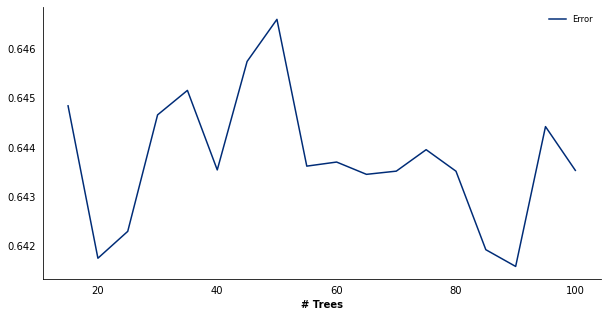

In [88]:
fig, ax = plt.subplots(figsize=(10,5))
results.plot(x="# Trees", y="Error", kind='line', ax=ax)
ax.legend(loc="upper right");

**In this example, some more trees may be useful to improve stability**

An even more complete example can be found here: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

## Gradient Boosted Tree Regression

Gradient Boosted Models (GBM) work in an entirely different way compared to Random Forest Models, even though they are also built using a large number of small trees. 

Gradient Boosted Trees are decision trees that are built iteratively and not independently, where each subsequent tree attempts to predict the residuals of the sum of the prior trees, and thereby theoretically improving the overall fit. The total sum across all trees generates the prediction. 

The basic Gradient Boosted Tree has some drawbacks over more sophisticated methods:
* Susceptible to overfitting (early stopping can be adopted to avoid too many trees)
* Cannot be parallelized, since each tree is dependent on the prior trees

Popular gradient boosting algorithms include xgboost, lightgbm, cat-boost have superior performance and speed. We will cover these in other notebook templates. 

**Parameters**

GBT have additional parameters compared to a single decision tree:
* **Number of trees** (Random Forest has this too)
* **Subsampling rate** for each tree, which is 100% for basic gradient boosting (unlike Random Forest, where a smaller fraction is expected)
* **Fraction of dataset** to set aside for validation, which is used for early stopping 
* **Stopping criteria**, set as number of iterations without improvement to validation fit, where amount of required improvement is provided as a **tolerance** value
* **Learning rate** applied to each incremental tree to limit its contribution. There is a trade-off between learning rate and number of trees. Too high learning rate may risk overfitting easier

For syntax, see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

Read more about early stopping here: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html


In [89]:
x_variables = ['Recent', 'Automatic', 'log_Levy', 'log_Mileage', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               "Model_encoded"]

### Tuning the gradient boosted tree regression using Randomized Search

Given the large number of different parameters to set for Gradient Boosted Tree regression, we will use Randomized Search instead of Grid Search. Another popular method is Bayesian Search, which is not offered by sklearn, and is covered in a separate template for advanced tuning and feature selection. 

Overall, RandomizedSearchCV is set up similar to GridSearchCV (covered in Decision Tree and Random Forest sections), but instead of traversing all combinations of parameters, it randomizes the selection of parameter values. Note:
* Possible values for a parameter can be provided as a list, or as a distribution. If any parameter range is provided as a distribution, sampling will always be 'with replacement', and if not, it will be 'without replacement'. It is highly recommended to use distributions for continuous variables. 


Syntax: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from scipy.stats import uniform


param_distributions = {
    "n_estimators": [100],
    "subsample": [1],
    "learning_rate": uniform(loc=0.1,scale=0.5),
    "max_depth": [2,3,4,5],
    "min_samples_split":uniform(loc=0,scale=0.1),
    "min_samples_leaf":uniform(loc=0,scale=0.1),
    "min_impurity_decrease": uniform(loc=0,scale=2),
    "ccp_alpha": uniform(loc=0,scale=2),
    "max_features": ['sqrt', 0.5],
}

# Fixed parameters can also be passed directly in the model instantiation
gradient_boosting_model = ensemble.GradientBoostingRegressor(criterion='squared_error', validation_fraction=0.1, n_iter_no_change=10)

gradient_boosting_tuning = RandomizedSearchCV(gradient_boosting_model, param_distributions, 
                                              n_iter = 50, cv = 5, random_state=1000, verbose=2)
gradient_boosting_tuning = gradient_boosting_tuning.fit(X_train_num[x_variables], y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ccp_alpha=1.307179170929219, learning_rate=0.15750347156220287, max_depth=5, max_features=sqrt, min_impurity_decrease=0.9643828028559964, min_samples_leaf=0.08724745351820354, min_samples_split=0.021233268092271995, n_estimators=100, subsample=1; total time=   0.5s
[CV] END ccp_alpha=1.307179170929219, learning_rate=0.15750347156220287, max_depth=5, max_features=sqrt, min_impurity_decrease=0.9643828028559964, min_samples_leaf=0.08724745351820354, min_samples_split=0.021233268092271995, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=1.307179170929219, learning_rate=0.15750347156220287, max_depth=5, max_features=sqrt, min_impurity_decrease=0.9643828028559964, min_samples_leaf=0.08724745351820354, min_samples_split=0.021233268092271995, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=1.307179170929219, learning_rate=0.15750347156220287, max_depth=5, max_features=sqrt, min_impu

[CV] END ccp_alpha=1.3958502008194384, learning_rate=0.2991024417629675, max_depth=3, max_features=sqrt, min_impurity_decrease=0.362015020547406, min_samples_leaf=0.04324991717920135, min_samples_split=0.0018143202754672628, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=1.3958502008194384, learning_rate=0.2991024417629675, max_depth=3, max_features=sqrt, min_impurity_decrease=0.362015020547406, min_samples_leaf=0.04324991717920135, min_samples_split=0.0018143202754672628, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=1.3958502008194384, learning_rate=0.2991024417629675, max_depth=3, max_features=sqrt, min_impurity_decrease=0.362015020547406, min_samples_leaf=0.04324991717920135, min_samples_split=0.0018143202754672628, n_estimators=100, subsample=1; total time=   0.2s
[CV] END ccp_alpha=1.3958502008194384, learning_rate=0.2991024417629675, max_depth=3, max_features=sqrt, min_impurity_decrease=0.362015020547406, min_samples_leaf=0.0432499171

[CV] END ccp_alpha=1.374178027844899, learning_rate=0.4511176437366383, max_depth=3, max_features=sqrt, min_impurity_decrease=0.8406441561984266, min_samples_leaf=0.08026305910699383, min_samples_split=0.05386175653186749, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=1.374178027844899, learning_rate=0.4511176437366383, max_depth=3, max_features=sqrt, min_impurity_decrease=0.8406441561984266, min_samples_leaf=0.08026305910699383, min_samples_split=0.05386175653186749, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=1.374178027844899, learning_rate=0.4511176437366383, max_depth=3, max_features=sqrt, min_impurity_decrease=0.8406441561984266, min_samples_leaf=0.08026305910699383, min_samples_split=0.05386175653186749, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=1.374178027844899, learning_rate=0.4511176437366383, max_depth=3, max_features=sqrt, min_impurity_decrease=0.8406441561984266, min_samples_leaf=0.0802630591069938

[CV] END ccp_alpha=1.5876443953948995, learning_rate=0.4627015749441883, max_depth=3, max_features=sqrt, min_impurity_decrease=0.9651689863268573, min_samples_leaf=0.04764776103724863, min_samples_split=0.044603283044001046, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=1.5876443953948995, learning_rate=0.4627015749441883, max_depth=3, max_features=sqrt, min_impurity_decrease=0.9651689863268573, min_samples_leaf=0.04764776103724863, min_samples_split=0.044603283044001046, n_estimators=100, subsample=1; total time=   0.1s
[CV] END ccp_alpha=1.5876443953948995, learning_rate=0.4627015749441883, max_depth=3, max_features=sqrt, min_impurity_decrease=0.9651689863268573, min_samples_leaf=0.04764776103724863, min_samples_split=0.044603283044001046, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=1.5876443953948995, learning_rate=0.4627015749441883, max_depth=3, max_features=sqrt, min_impurity_decrease=0.9651689863268573, min_samples_leaf=0.047647761

[CV] END ccp_alpha=0.6987127007850957, learning_rate=0.23684062968947708, max_depth=4, max_features=sqrt, min_impurity_decrease=0.061948919998556784, min_samples_leaf=0.032416908981897474, min_samples_split=0.028659274764898823, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=0.6987127007850957, learning_rate=0.23684062968947708, max_depth=4, max_features=sqrt, min_impurity_decrease=0.061948919998556784, min_samples_leaf=0.032416908981897474, min_samples_split=0.028659274764898823, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=0.6987127007850957, learning_rate=0.23684062968947708, max_depth=4, max_features=sqrt, min_impurity_decrease=0.061948919998556784, min_samples_leaf=0.032416908981897474, min_samples_split=0.028659274764898823, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=0.6987127007850957, learning_rate=0.23684062968947708, max_depth=4, max_features=sqrt, min_impurity_decrease=0.061948919998556784, min_samples_l

[CV] END ccp_alpha=0.2571169442187491, learning_rate=0.22025158745576287, max_depth=4, max_features=0.5, min_impurity_decrease=0.6664729501296369, min_samples_leaf=0.07921640161408444, min_samples_split=0.024434692768040125, n_estimators=100, subsample=1; total time=   0.6s
[CV] END ccp_alpha=0.2571169442187491, learning_rate=0.22025158745576287, max_depth=4, max_features=0.5, min_impurity_decrease=0.6664729501296369, min_samples_leaf=0.07921640161408444, min_samples_split=0.024434692768040125, n_estimators=100, subsample=1; total time=   0.6s
[CV] END ccp_alpha=0.2571169442187491, learning_rate=0.22025158745576287, max_depth=4, max_features=0.5, min_impurity_decrease=0.6664729501296369, min_samples_leaf=0.07921640161408444, min_samples_split=0.024434692768040125, n_estimators=100, subsample=1; total time=   0.6s
[CV] END ccp_alpha=0.2571169442187491, learning_rate=0.22025158745576287, max_depth=4, max_features=0.5, min_impurity_decrease=0.6664729501296369, min_samples_leaf=0.079216401

[CV] END ccp_alpha=0.36973301533657277, learning_rate=0.5172281166492838, max_depth=3, max_features=0.5, min_impurity_decrease=0.0673322656684896, min_samples_leaf=0.007204403481688349, min_samples_split=0.06369458017871925, n_estimators=100, subsample=1; total time=   0.6s
[CV] END ccp_alpha=0.36973301533657277, learning_rate=0.5172281166492838, max_depth=3, max_features=0.5, min_impurity_decrease=0.0673322656684896, min_samples_leaf=0.007204403481688349, min_samples_split=0.06369458017871925, n_estimators=100, subsample=1; total time=   0.1s
[CV] END ccp_alpha=0.36973301533657277, learning_rate=0.5172281166492838, max_depth=3, max_features=0.5, min_impurity_decrease=0.0673322656684896, min_samples_leaf=0.007204403481688349, min_samples_split=0.06369458017871925, n_estimators=100, subsample=1; total time=   0.6s
[CV] END ccp_alpha=0.36973301533657277, learning_rate=0.5172281166492838, max_depth=3, max_features=0.5, min_impurity_decrease=0.0673322656684896, min_samples_leaf=0.007204403

[CV] END ccp_alpha=1.3594232095065586, learning_rate=0.2369714737981655, max_depth=5, max_features=0.5, min_impurity_decrease=0.3410703859888735, min_samples_leaf=0.054227727004286144, min_samples_split=0.05991117465798246, n_estimators=100, subsample=1; total time=   0.9s
[CV] END ccp_alpha=1.3594232095065586, learning_rate=0.2369714737981655, max_depth=5, max_features=0.5, min_impurity_decrease=0.3410703859888735, min_samples_leaf=0.054227727004286144, min_samples_split=0.05991117465798246, n_estimators=100, subsample=1; total time=   0.8s
[CV] END ccp_alpha=1.3594232095065586, learning_rate=0.2369714737981655, max_depth=5, max_features=0.5, min_impurity_decrease=0.3410703859888735, min_samples_leaf=0.054227727004286144, min_samples_split=0.05991117465798246, n_estimators=100, subsample=1; total time=   0.7s
[CV] END ccp_alpha=1.3594232095065586, learning_rate=0.2369714737981655, max_depth=5, max_features=0.5, min_impurity_decrease=0.3410703859888735, min_samples_leaf=0.0542277270042

[CV] END ccp_alpha=0.9156790126537371, learning_rate=0.360529306724123, max_depth=3, max_features=sqrt, min_impurity_decrease=1.0655868988192319, min_samples_leaf=0.011922738802284272, min_samples_split=0.011432095765878947, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=0.9156790126537371, learning_rate=0.360529306724123, max_depth=3, max_features=sqrt, min_impurity_decrease=1.0655868988192319, min_samples_leaf=0.011922738802284272, min_samples_split=0.011432095765878947, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=0.9156790126537371, learning_rate=0.360529306724123, max_depth=3, max_features=sqrt, min_impurity_decrease=1.0655868988192319, min_samples_leaf=0.011922738802284272, min_samples_split=0.011432095765878947, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=0.9156790126537371, learning_rate=0.360529306724123, max_depth=3, max_features=sqrt, min_impurity_decrease=1.0655868988192319, min_samples_leaf=0.0119227388

**We can view the full results**

In [91]:
full_results = pd.DataFrame(gradient_boosting_tuning.cv_results_).drop(columns=['params']).sort_values(by=['mean_test_score'], ascending=False)
full_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_learning_rate,param_max_depth,param_max_features,param_min_impurity_decrease,param_min_samples_leaf,...,param_n_estimators,param_subsample,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.9521,0.1605,0.0114,0.0016,1.0392,0.3830,5,0.5000,0.2751,0.0214,...,100,1,0.5687,0.6014,0.5948,0.5776,0.5690,0.5823,0.0135,1
26,0.4876,0.1483,0.0106,0.0024,1.3653,0.5461,4,sqrt,0.1636,0.0117,...,100,1,0.5719,0.5983,0.5959,0.5772,0.5288,0.5744,0.0250,2
5,0.6842,0.2668,0.0146,0.0044,1.7702,0.5521,5,sqrt,0.1491,0.0245,...,100,1,0.5716,0.5748,0.5714,0.5695,0.5692,0.5713,0.0020,3
27,0.4916,0.0705,0.0088,0.0007,1.8476,0.5910,5,sqrt,0.1270,0.0128,...,100,1,0.5415,0.5905,0.5831,0.5807,0.5582,0.5708,0.0182,4
14,0.6309,0.1070,0.0130,0.0030,0.5071,0.4628,5,sqrt,1.0750,0.0237,...,100,1,0.5776,0.5767,0.5761,0.5633,0.5513,0.5690,0.0103,5


**And we can get the best results**

In [92]:
# Best results
print("Best score: {}".format(gradient_boosting_tuning.best_score_))
print("Best index: {}".format(gradient_boosting_tuning.best_index_))
print("Best parameters: {}".format(gradient_boosting_tuning.best_params_))

Best score: 0.5823227389122438
Best index: 9
Best parameters: {'ccp_alpha': 1.0392085944470695, 'learning_rate': 0.38299441528453515, 'max_depth': 5, 'max_features': 0.5, 'min_impurity_decrease': 0.27511231441853456, 'min_samples_leaf': 0.02135431911374628, 'min_samples_split': 0.013337189210614298, 'n_estimators': 100, 'subsample': 1}


### Fit a single gradient boosting model

We can choose to fit a single gradient boosting model, which still requires appropriate selection of the number of trees through the use of early stopping.

Here, we use the best parameters from the hyperparameter tuning above, rounding a bit to more convenient values. Instead of typing out each argument, we can use a dictionary to pass the parameters to the function, with help of the ** symbol.

In [93]:
gbm_parameters = {'ccp_alpha': 1.4, 'learning_rate': 0.55, 'max_depth': 4, 
                  'max_features': 'sqrt', 'min_impurity_decrease': 0.16, 
                  'min_samples_leaf': 0.02, 
                  'min_samples_split': 0.004, 'n_estimators': 500, 'subsample': 1}

gradient_boosting_model = ensemble.GradientBoostingRegressor(criterion='squared_error', 
                                                             **gbm_parameters, 
                                                             validation_fraction=0.1, n_iter_no_change=10, tol=0.01, 
                                                             verbose=1, random_state=10000)

# Fit the model
gradient_boosting_model_fitted = gradient_boosting_model.fit(X_train_num[x_variables], y_train)

# Note that the 'Train Loss' are not indicative of expected model performance since Gradient Boosted models can easily overfit. See further below for analysis of model performance. 

      Iter       Train Loss   Remaining Time 
         1   186050041.7223            4.49s
         2   167159388.2284            4.73s
         3   144608692.5604            4.31s
         4   136089184.7558            3.84s
         5   129016446.1491            3.76s
         6   125527588.7903            3.54s
         7   123055665.0123            3.66s
         8   120502338.3409            3.63s
         9   119132117.0215            3.55s
        10   117857247.8823            3.63s
        20   104562446.7765            3.58s
        30    99123955.2949            3.46s
        40    95836390.1285            3.35s
        50    92707524.4207            3.28s
        60    90904769.4747            3.26s
        70    89594283.3494            3.18s
        80    88004681.5472            3.08s
        90    86462339.8627            2.99s
       100    85558114.3577            2.88s


**Variable importance**

We can't easily visualize a gradient boosting model with hundreds of trees like we could for a single decision tree, and we don't have variable coefficients like a linear model. Therefore, we need other techniques to understand the importance of each variable in the model.

Variable importance (a.k.a. feature importance) is therefore often calculated, and measure the impact of a variable on the model fit. The GradientBoostingRegressor provides a simple estimate of feature importance, based on the (normalized) total reduction of the error term brought by that feature. 

This estimate doesn't work well for features with very many unique values (e.g. continuous variables). Sklearn provides a model-agnostic feature importance metric, based on the impact of a variable on model fit if that variable is permutated (shuffled). This is accomplished using https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance and is covered in the notebook for Model Interpretation 

In [94]:
pd.DataFrame({"Variable": gradient_boosting_model.feature_names_in_, "Importance": gradient_boosting_model.feature_importances_}).sort_values(by="Importance", ascending=False)

,Variable,Importance
13,Model_encoded,0.2466
0,Recent,0.1853
4,Category_clean_Jeep,0.1633
3,log_Mileage,0.1404
2,log_Levy,0.1314
7,Cylinders_clean_7 or more,0.0405
1,Automatic,0.0221
6,Cylinders_clean_5 or 6,0.0173
12,Manufacturer_clean_Other,0.0146
5,Category_clean_Other,0.0135
